In [146]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\CVR\\Desktop\\6655\\GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


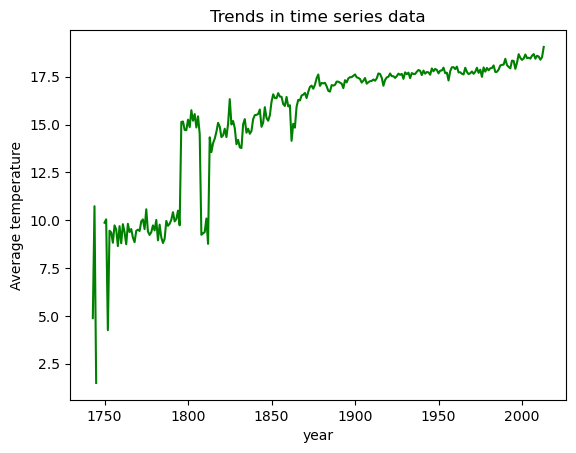

In [14]:
df['dt']=pd.to_datetime(df['dt'])
x=df['Year']=df['dt'].dt.year
y=df.groupby('Year')['AverageTemperature'].mean()
plt.plot(y.index,y.values,linewidth=1.5,color='green')
plt.xlabel("year")
plt.ylabel("Average temperature")
plt.title("Trends in time series data")
plt.show()

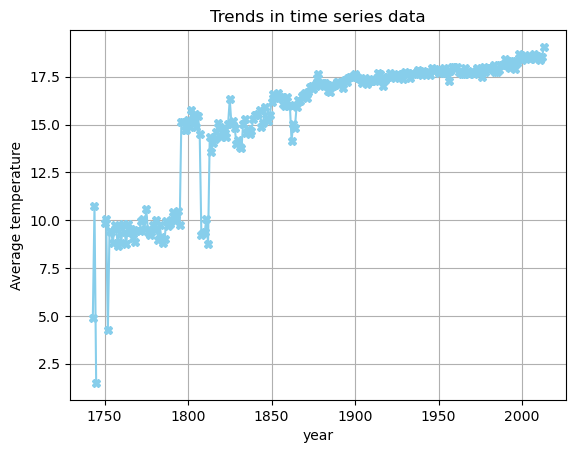

In [150]:
df['dt']=pd.to_datetime(df['dt'],errors='coerce')
df['Year']=df['dt'].dt.year
annual_avg_temp=df.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linewidth=1.5,color='skyblue',marker='X')
plt.xlabel("year")
plt.ylabel("Average temperature")
plt.title("Trends in time series data")
plt.grid(True)
plt.savefig('plot')
plt.show()

In [59]:
x=df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False).head(10)
x

Country
Djibouti         29.152790
Niger            28.145552
Sudan            28.072831
Burkina Faso     27.815295
Mali             27.590491
Chad             27.189829
Guinea Bissau    27.057185
Mauritania       27.021905
Benin            26.975880
Cambodia         26.918136
Name: AverageTemperature, dtype: float64

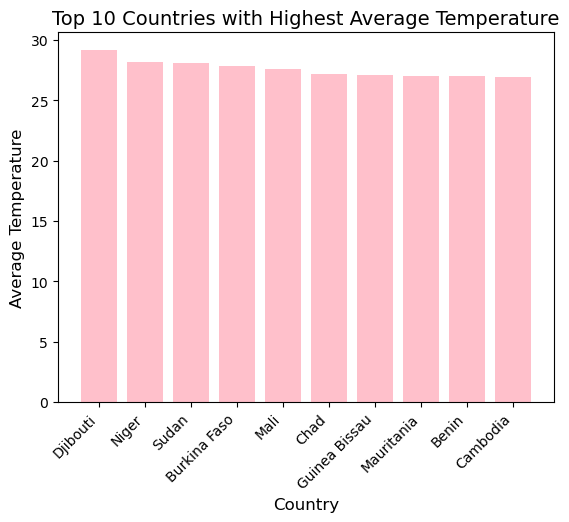

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

x = df.groupby('Country')['AverageTemperature'].mean()
x = x.sort_values(ascending=False).head(10)
plt.bar(x.index,x.values,color='pink')
plt.title('Top 10 Countries with Highest Average Temperature', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [39]:
x

Country
Djibouti         29.152790
Niger            28.145552
Sudan            28.072831
Burkina Faso     27.815295
Mali             27.590491
Chad             27.189829
Guinea Bissau    27.057185
Mauritania       27.021905
Benin            26.975880
Cambodia         26.918136
Name: AverageTemperature, dtype: float64

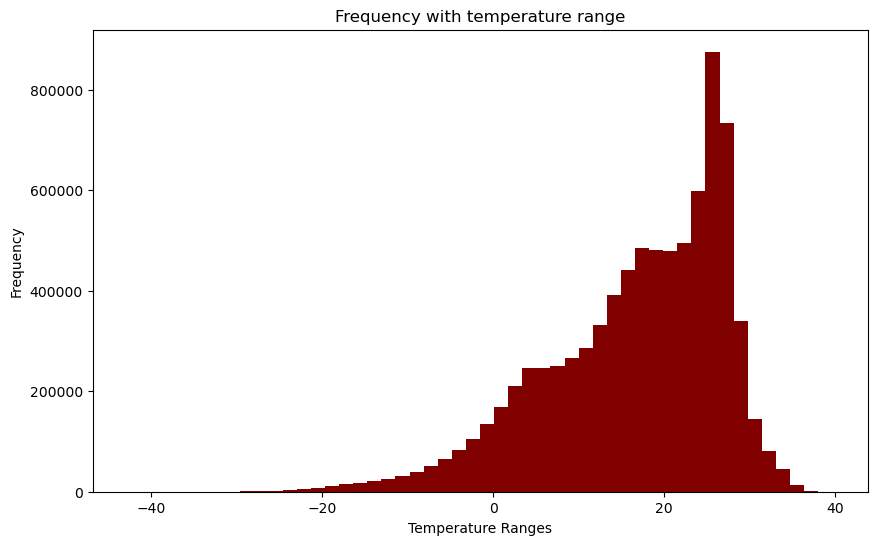

In [73]:
x=df['AverageTemperature'].dropna()
plt.figure(figsize=(10,6))
plt.hist(x,bins=50,color='maroon')
plt.xlabel("Temperature Ranges")
plt.ylabel("Frequency")
plt.title("Frequency with temperature range")
plt.show()

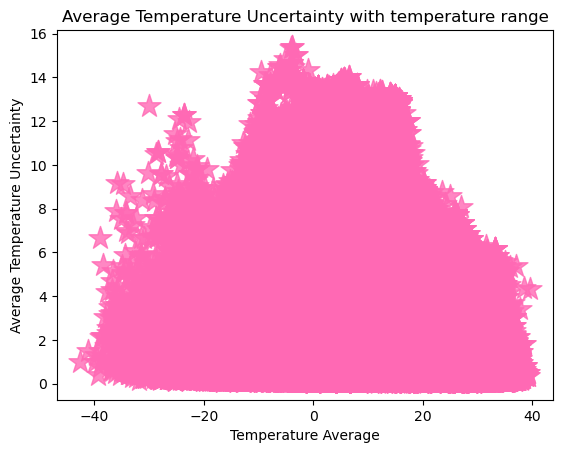

In [81]:
x=df['AverageTemperature'].dropna()
y=df['AverageTemperatureUncertainty'].dropna()
plt.scatter(x,y,color="hotpink",marker='*',s=300,alpha=0.8)
plt.xlabel("Temperature Average")
plt.ylabel("Average Temperature Uncertainty")
plt.title("Average Temperature Uncertainty with temperature range")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_1512\3528510078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['dt'] = pd.to_datetime(df_india['dt'], errors='coerce')
C:\Users\CVR\AppData\Local\Temp\ipykernel_1512\3528510078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['Year'] = df_india['dt'].dt.year


<Figure size 1200x600 with 0 Axes>

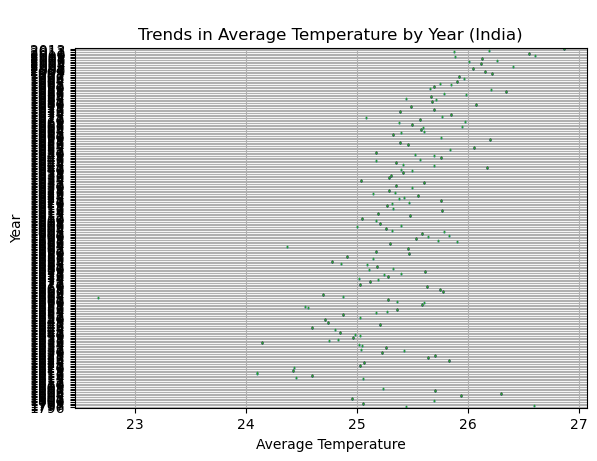

In [147]:
df_india = df[df['Country'] == 'India']
df_india['dt'] = pd.to_datetime(df_india['dt'], errors='coerce')
df_india['Year'] = df_india['dt'].dt.year
annual_avg_temp_india = df_india.groupby('Year')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12,6))
annual_avg_temp_india.boxplot(column='AverageTemperature', by='Year', vert=False)
plt.xlabel("Average Temperature")
plt.ylabel("Year")
plt.title("Trends in Average Temperature by Year (India)")
plt.suptitle(' ')  
plt.show()


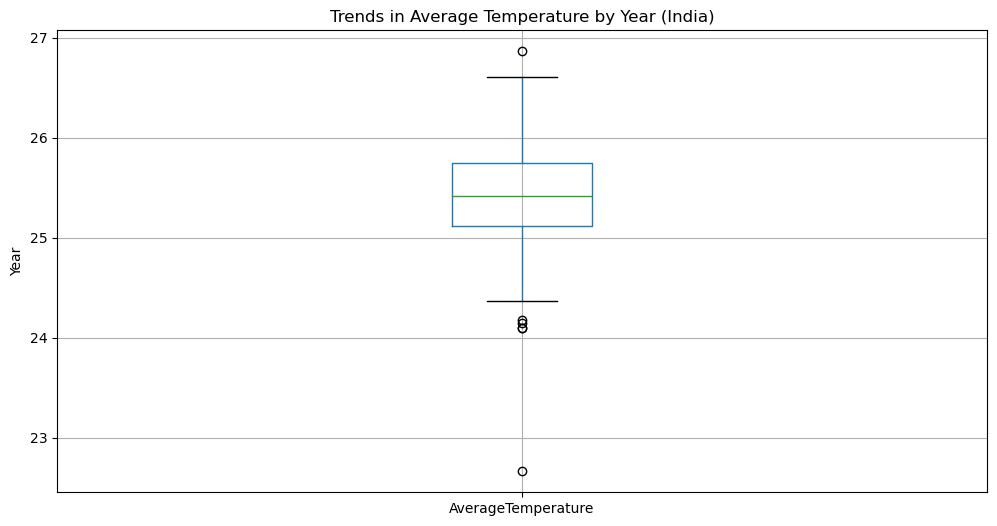

In [149]:
df_india = df[df['Country'] == 'India'].copy()
df_india['dt'] = pd.to_datetime(df_india['dt'], errors='coerce')
df_india['Year'] = df_india['dt'].dt.year
annual_avg_temp_india = df_india.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
annual_avg_temp_india.boxplot(column='AverageTemperature') #, by='Year', vert=False
plt.ylabel("Year")
plt.title("Trends in Average Temperature by Year (India)")
plt.show()


In [97]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [98]:
import seaborn as sns

In [99]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


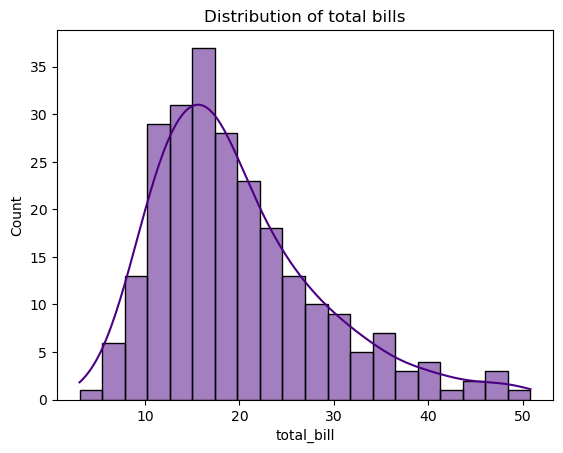

In [111]:
sns.histplot(data=tips,x='total_bill',kde=True,bins=20,color='indigo')
plt.title("Distribution of total bills")
plt.show()

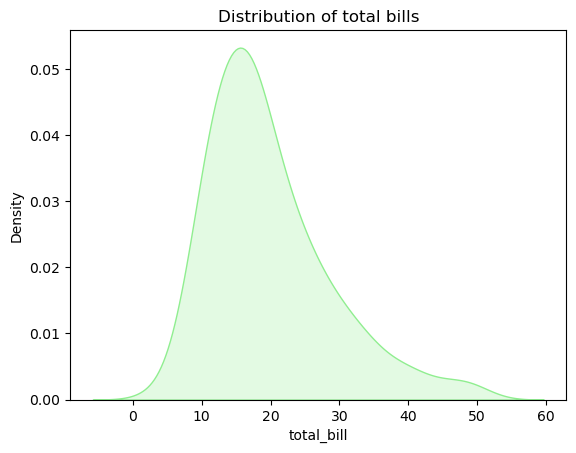

In [115]:
sns.kdeplot(data=tips,x='total_bill',fill=True,color='lightgreen')
plt.title("Distribution of total bills")
plt.show()

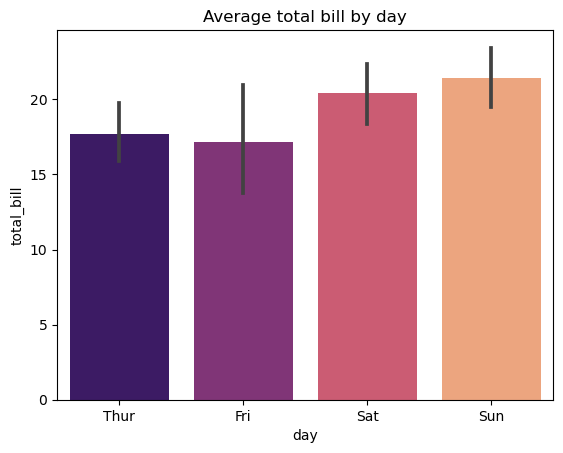

In [120]:
sns.barplot(data=tips,x='day',y='total_bill',palette='magma')
plt.title("Average total bill by day")
plt.show()

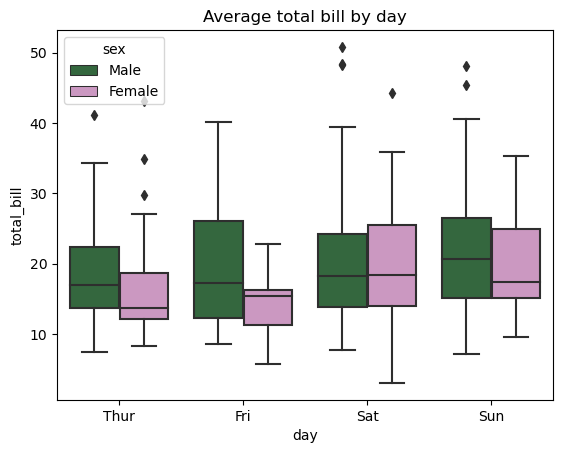

In [126]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='cubehelix')
plt.title("Average total bill by day")
plt.show()

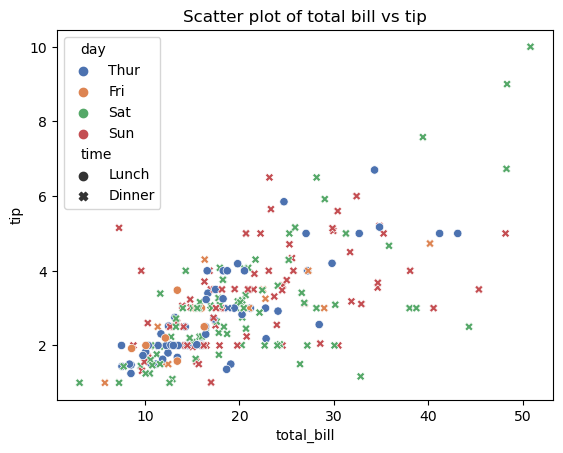

In [129]:
sns.scatterplot(data=tips,x="total_bill",y='tip',hue='day',style='time',palette='deep')
plt.title("Scatter plot of total bill vs tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


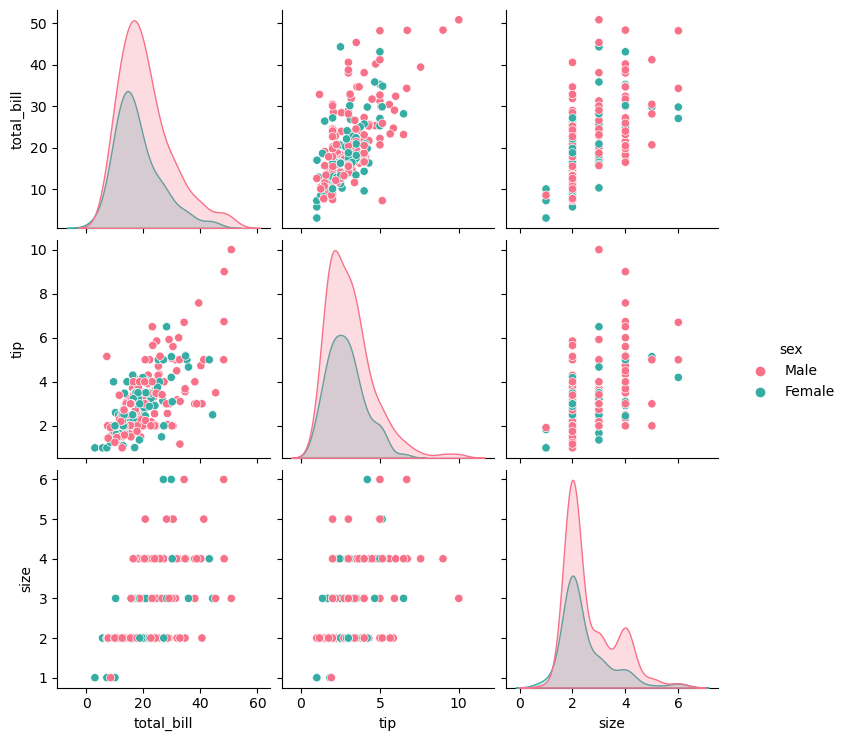

In [130]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

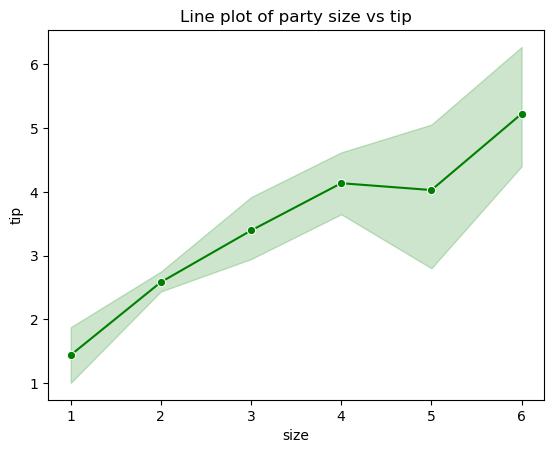

In [131]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="green")
plt.title("Line plot of party size vs tip")
plt.show()

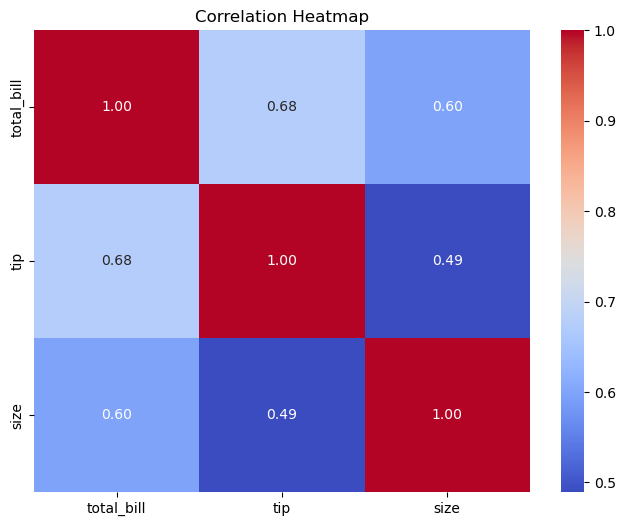

In [139]:
numeric_tips = tips.select_dtypes(include=['number'])
correlation_matrix = numeric_tips.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [140]:
df=pd.read_csv("C:\\Users\\CVR\\Desktop\\6655\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


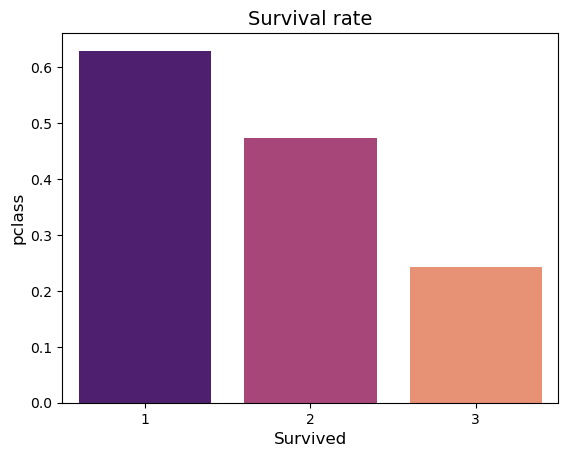

In [141]:
sns.barplot(data=df,x='Pclass',y='Survived',errorbar=None,palette="magma")
plt.title('Survival rate', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('pclass', fontsize=12)
plt.show()

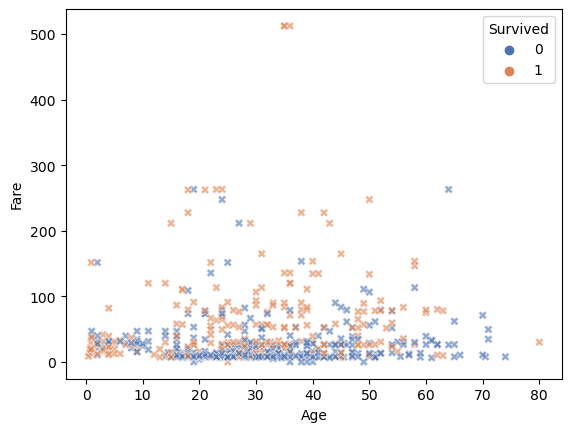

In [142]:
sns.scatterplot(data=df,x='Age',y='Fare',palette="deep",hue='Survived',alpha=0.6,marker='X')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


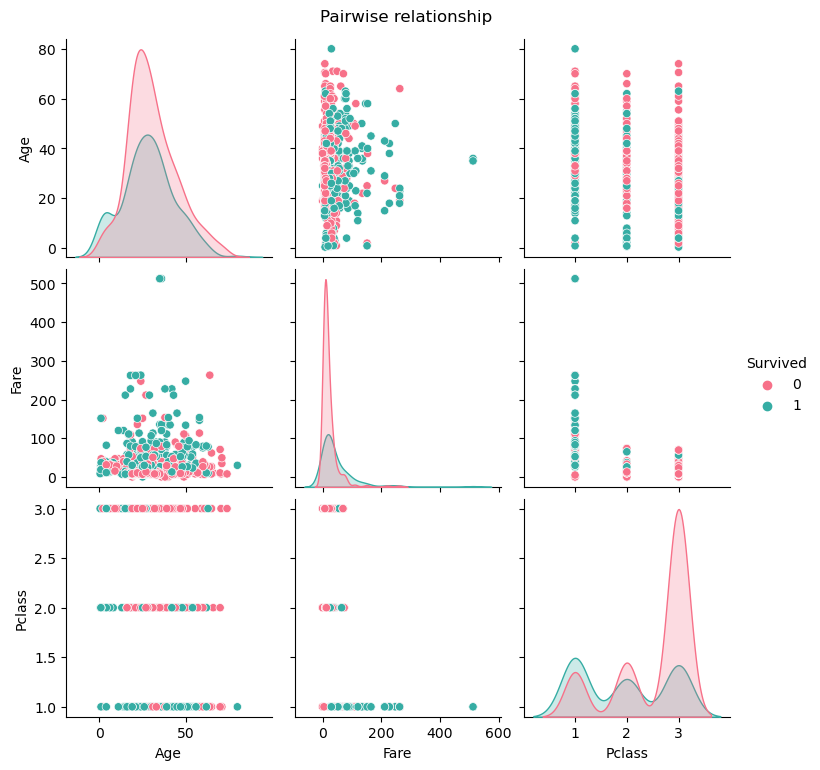

In [143]:
x=df[['Age','Fare','Pclass','Survived']]
sns.pairplot(data=x,hue='Survived',palette="husl",diag_kind='kde')
plt.suptitle("Pairwise relationship",y=1.02)
plt.show()

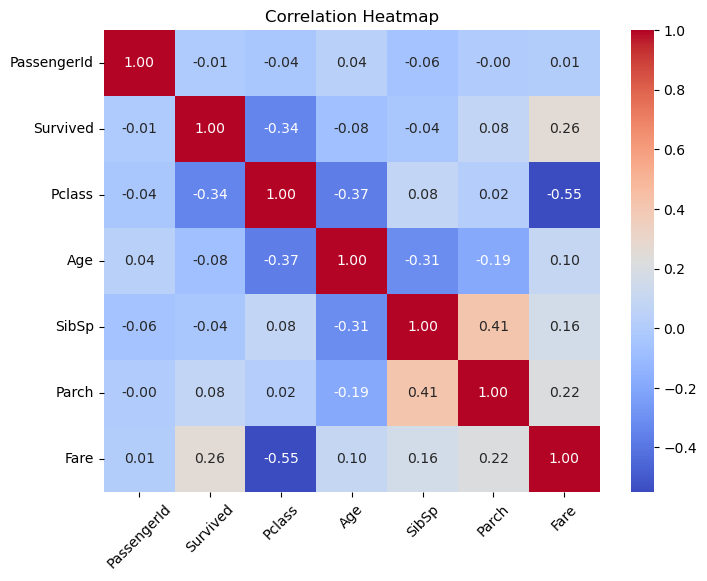

In [144]:
numeric_tips = df.select_dtypes(include=['number'])
correlation_matrix = numeric_tips.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()
